# GRU로 한글 의도 분류 (Intent Classification)


## Bidirectional GRU for better context understanding

### tensorflow

In [ ]:

# 필요한 라이브러리 설치 및 임포트
!pip install konlpy matplotlib seaborn wordcloud -q


In [2]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

# 폰트 설정
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126380 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_la

예제 6: GRU로 한글 의도 분류 (Intent Classification)
어휘 크기: 219
총 문장 수: 100
의도 종류: 10개
의도 목록: [np.str_('alarm'), np.str_('call'), np.str_('game'), np.str_('info'), np.str_('message'), np.str_('music'), np.str_('schedule'), np.str_('search'), np.str_('shopping'), np.str_('weather')]

의도별 데이터 수:
  weather: 10개
  music: 10개
  alarm: 10개
  schedule: 10개
  call: 10개
  message: 10개
  search: 10개
  shopping: 10개
  info: 10개
  game: 10개

빈도 상위 15개 단어:
  싶어요: 9회
  알려주세요: 8회
  오늘: 6회
  전화: 6회
  메시지: 6회
  게임: 6회
  알람: 5회
  내일: 4회
  음악: 4회
  일정: 4회
  확인: 4회
  주문: 4회
  날씨: 3회
  몇: 3회
  주: 3회

시퀀스 길이 통계:
  평균: 3.1
  중간값: 3.0
  최대: 5
  최소: 2

데이터 형태:
X shape: (100, 25)
y shape: (100, 10)
의도 클래스: ['alarm' 'call' 'game' 'info' 'message' 'music' 'schedule' 'search'
 'shopping' 'weather']


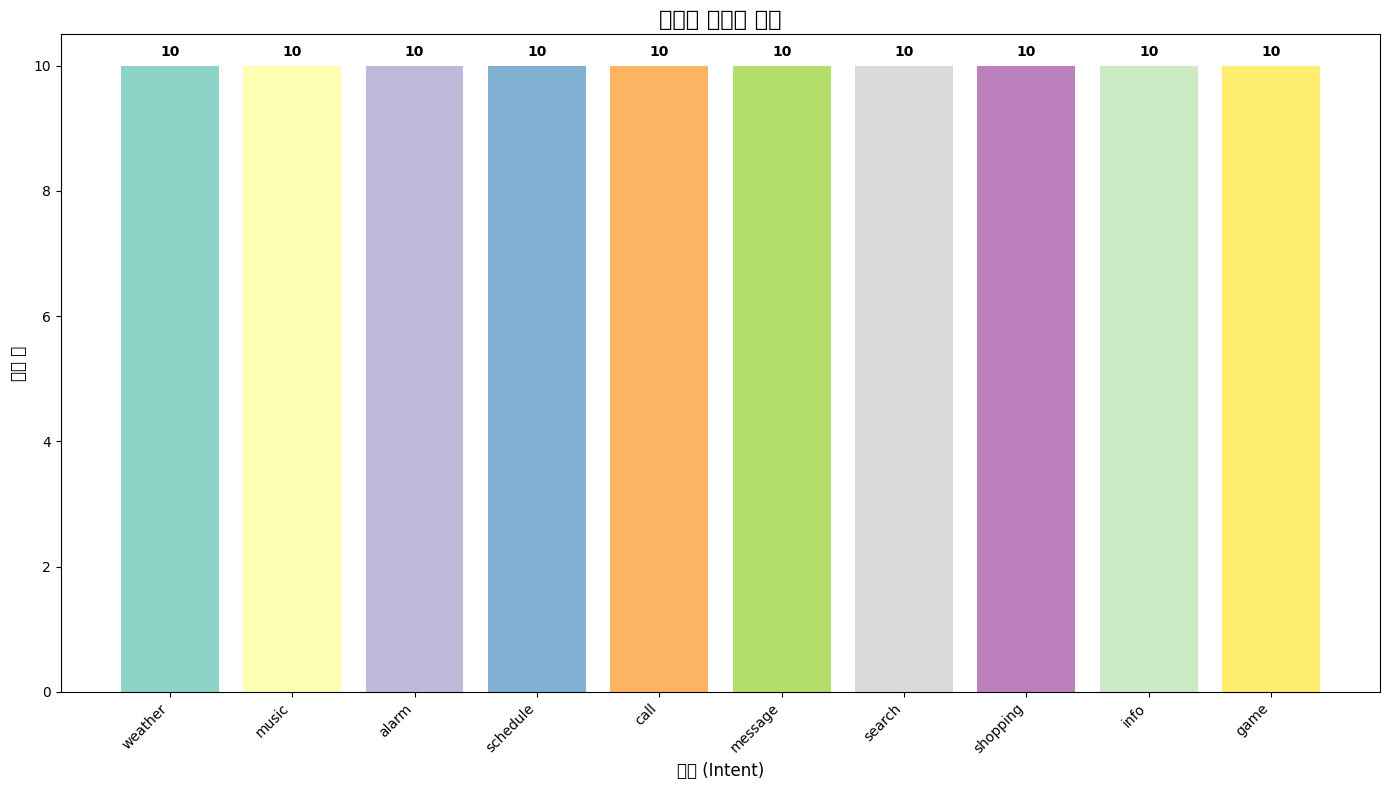

/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layo

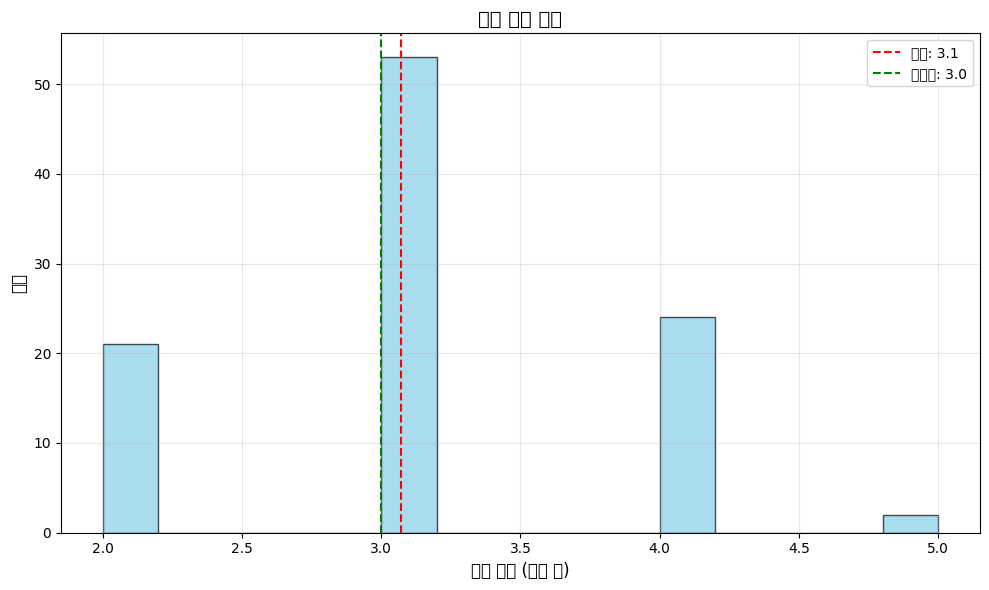

/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


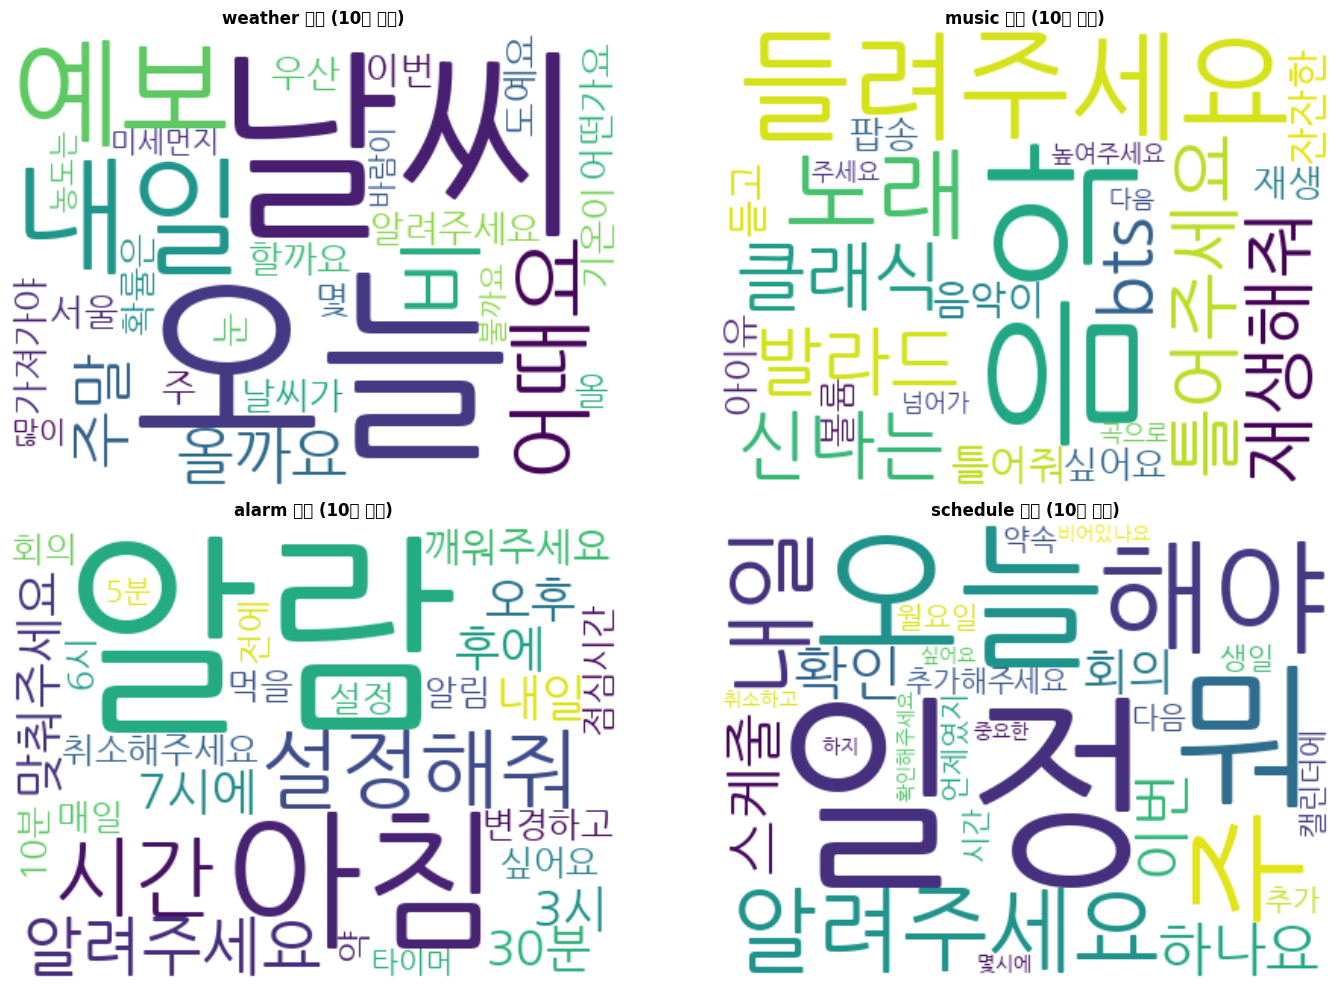

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



훈련 데이터: 80개
테스트 데이터: 20개

테스트 데이터셋 의도 분포:
  info: 2개
  message: 1개
  shopping: 4개
  call: 2개
  schedule: 4개
  alarm: 1개
  music: 3개
  weather: 2개
  game: 1개

모델 구조:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


모델 훈련 시작...
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0508 - loss: 3.3829

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.0569 - loss: 3.3641 - val_accuracy: 0.1000 - val_loss: 2.3030 - learning_rate: 0.0010
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.0851 - loss: 3.2139 - val_accuracy: 0.0500 - val_loss: 2.3042 - learning_rate: 0.0010
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.1576 - loss: 2.8477 - val_accuracy: 0.0500 - val_loss: 2.3065 - learning_rate: 0.0010
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0842 - loss: 3.2276 - val_accuracy: 0.0500 - val_loss: 2.3083 - learning_rate: 0.0010
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.1193 - loss: 2.7380 - val_accuracy: 0.0500 - val_loss: 2.3124 - learning_rate: 0.0010
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1389 - loss: 2.7339 - val_accuracy: 0.1000 - val_loss: 2.3165 - learning_rate: 0.0010
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1436 - loss: 2.8270 - val_accuracy: 0.1000 - va

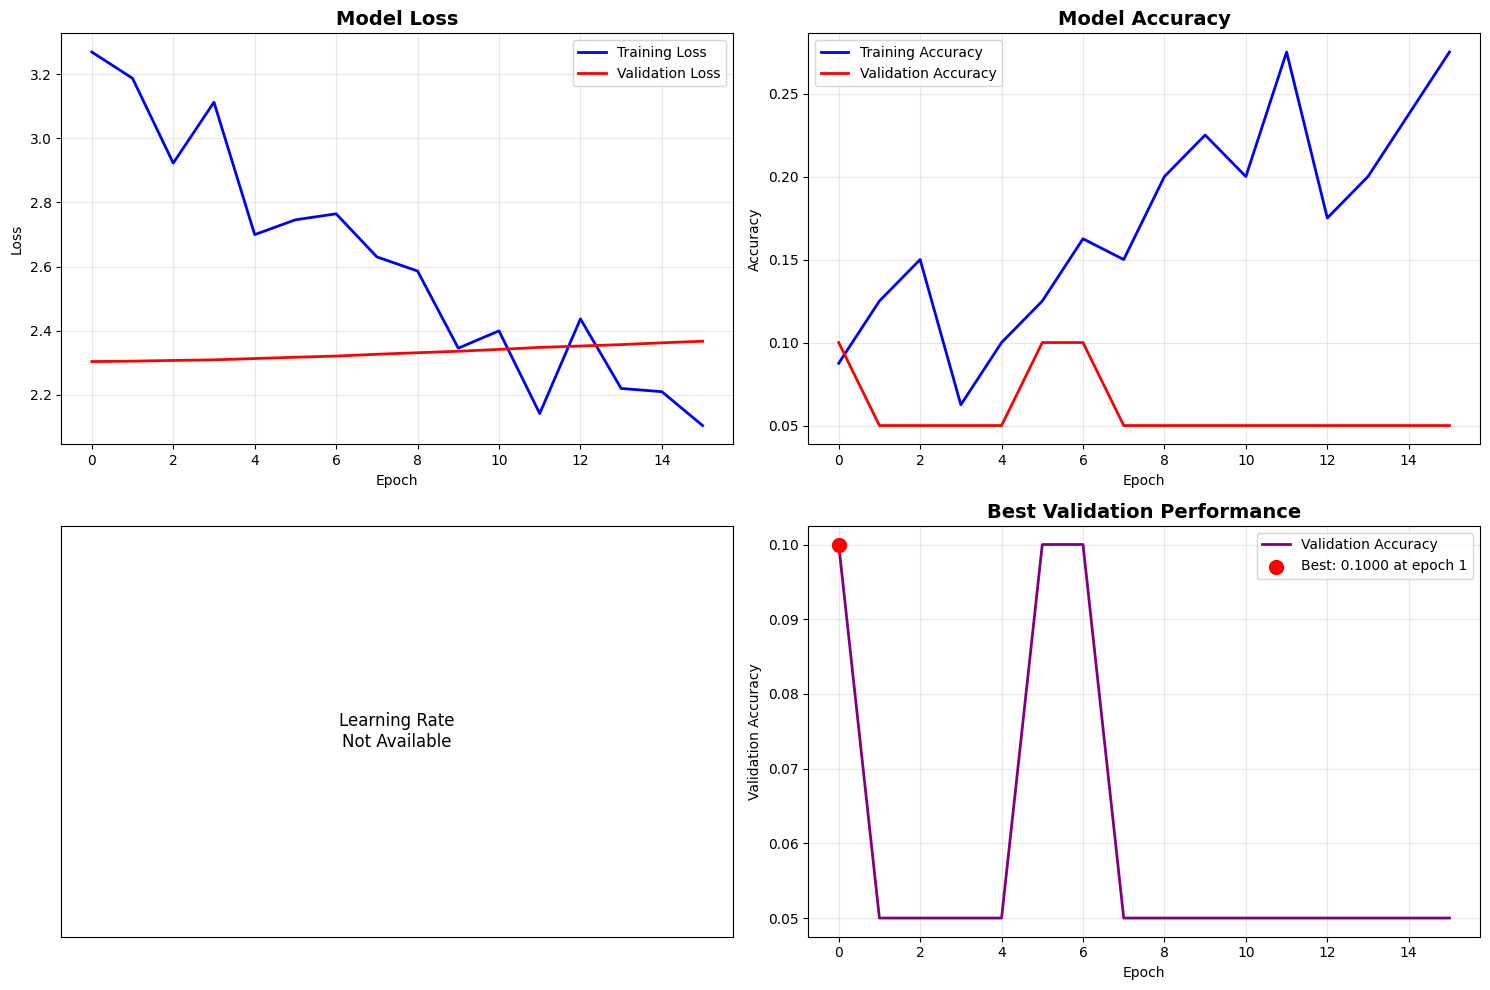

테스트 정확도: 0.1000
테스트 손실: 2.3030
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



의도 분류 성능 리포트:
              precision    recall  f1-score   support

       alarm       0.00      0.00      0.00         1
        call       0.00      0.00      0.00         2
        game       0.00      0.00      0.00         1
        info       0.13      1.00      0.24         2
     message       0.00      0.00      0.00         1
       music       0.00      0.00      0.00         3
    schedule       0.00      0.00      0.00         4
    shopping       0.00      0.00      0.00         4
     weather       0.00      0.00      0.00         2

    accuracy                           0.10        20
   macro avg       0.01      0.11      0.03        20
weighted avg       0.01      0.10      0.02        20



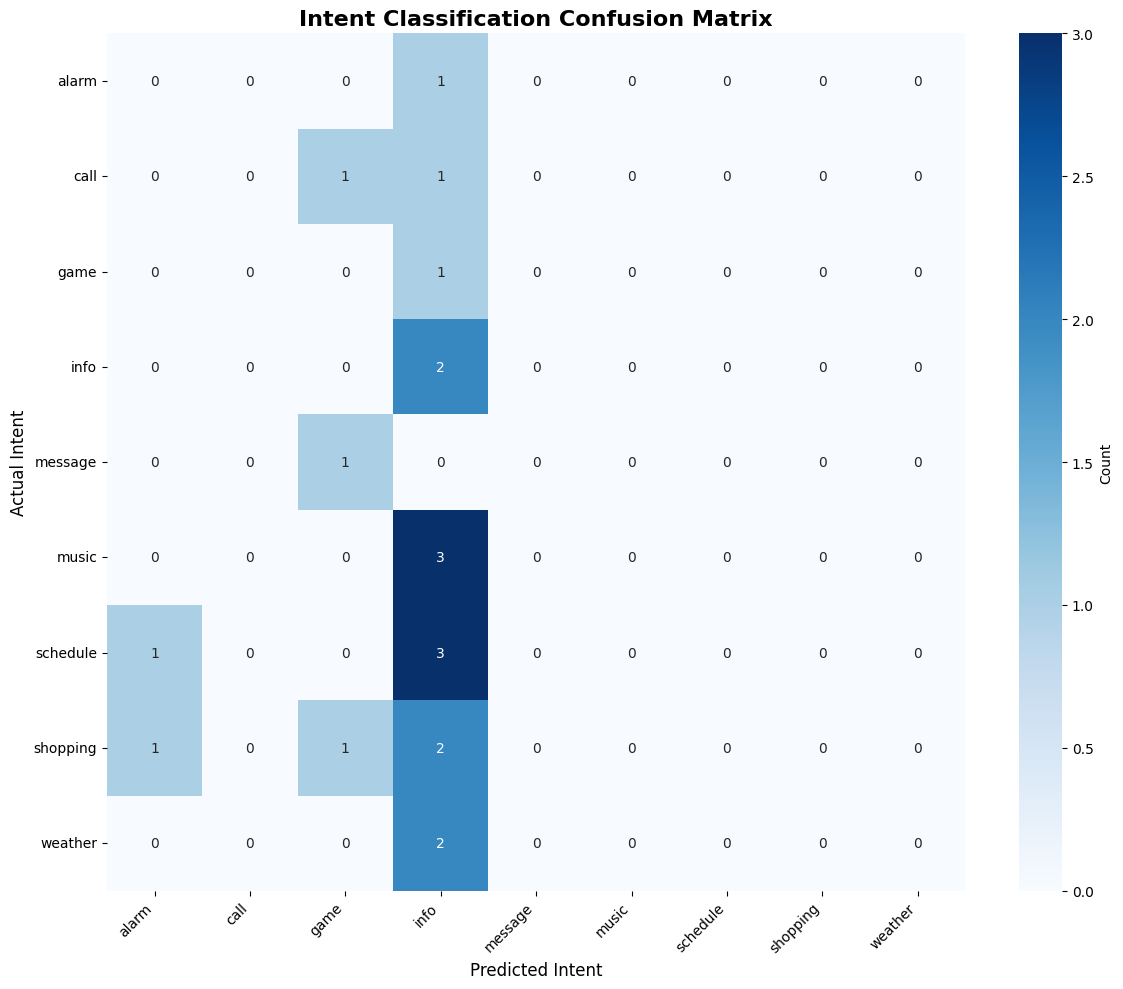


교차 검증 수행 여부를 선택하세요...

새로운 문장 의도 분류 결과
1. 🎮 문장: '내일 오전에 비가 올까요?'
   예측 의도: game (신뢰도: 0.101)
   상위 3개 예측:
     1. 🎮 game: 0.101
     2. ℹ️ info: 0.101
     3. 🌤️ weather: 0.100

2. 🎮 문장: '좋아하는 가수의 노래 들려주세요'
   예측 의도: game (신뢰도: 0.101)
   상위 3개 예측:
     1. 🎮 game: 0.101
     2. ℹ️ info: 0.101
     3. 🛒 shopping: 0.100

3. 🎮 문장: '오후 2시에 알람 설정해주세요'
   예측 의도: game (신뢰도: 0.101)
   상위 3개 예측:
     1. 🎮 game: 0.101
     2. ℹ️ info: 0.101
     3. ⏰ alarm: 0.100

4. ℹ️ 문장: '오늘 오후에 회의 있나요?'
   예측 의도: info (신뢰도: 0.101)
   상위 3개 예측:
     1. ℹ️ info: 0.101
     2. ⏰ alarm: 0.100
     3. 🎮 game: 0.100

5. ⏰ 문장: '친구한테 전화 걸어주세요'
   예측 의도: alarm (신뢰도: 0.101)
   상위 3개 예측:
     1. ⏰ alarm: 0.101
     2. 🎮 game: 0.101
     3. ℹ️ info: 0.101

6. 🎮 문장: '안녕하다고 문자 보내줘'
   예측 의도: game (신뢰도: 0.101)
   상위 3개 예측:
     1. 🎮 game: 0.101
     2. ℹ️ info: 0.101
     3. 🌤️ weather: 0.100

7. ℹ️ 문장: '근처 맛집 어디 있는지 찾아주세요'
   예측 의도: info (신뢰도: 0.101)
   상위 3개 예측:
     1. ℹ️ info: 0.101
     2. 🎮 game: 0.101
     3. 📞 call

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout, GlobalMaxPooling1D, BatchNormalization, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 한글 의도 분류 데이터셋 (스마트 어시스턴트용)
korean_intent_data = [
    # 날씨 문의 (weather)
    ("오늘 날씨 어때요?", "weather"),
    ("내일 비 올까요?", "weather"),
    ("주말 날씨 예보 알려주세요", "weather"),
    ("서울 날씨가 어떤가요?", "weather"),
    ("우산 가져가야 할까요?", "weather"),
    ("오늘 기온이 몇 도예요?", "weather"),
    ("내일 눈 올 확률은?", "weather"),
    ("이번 주 날씨 예보", "weather"),
    ("오늘 미세먼지 농도는?", "weather"),
    ("바람이 많이 불까요?", "weather"),

    # 음악 재생 (music)
    ("음악 틀어주세요", "music"),
    ("발라드 들려주세요", "music"),
    ("클래식 음악 재생해줘", "music"),
    ("BTS 노래 들려주세요", "music"),
    ("신나는 음악 틀어줘", "music"),
    ("잔잔한 음악이 듣고 싶어요", "music"),
    ("아이유 노래 재생", "music"),
    ("팝송 들려주세요", "music"),
    ("음악 볼륨 높여주세요", "music"),
    ("다음 곡으로 넘어가 주세요", "music"),

    # 알람 설정 (alarm)
    ("내일 아침 7시에 알람 맞춰주세요", "alarm"),
    ("오후 3시 알람 설정해줘", "alarm"),
    ("30분 후에 깨워주세요", "alarm"),
    ("알람 취소해주세요", "alarm"),
    ("알람 시간 변경하고 싶어요", "alarm"),
    ("매일 아침 6시 알람", "alarm"),
    ("점심시간 알림 설정", "alarm"),
    ("약 먹을 시간 알려주세요", "alarm"),
    ("회의 10분 전에 알려주세요", "alarm"),
    ("타이머 5분 설정해줘", "alarm"),

    # 일정 관리 (schedule)
    ("오늘 일정 알려주세요", "schedule"),
    ("내일 뭐 해야 하나요?", "schedule"),
    ("이번 주 스케줄 확인", "schedule"),
    ("회의 일정 추가해주세요", "schedule"),
    ("약속 시간 언제였지?", "schedule"),
    ("캘린더에 생일 추가", "schedule"),
    ("다음 주 월요일 비어있나요?", "schedule"),
    ("일정 취소하고 싶어요", "schedule"),
    ("중요한 일정 확인해주세요", "schedule"),
    ("오늘 몇시에 뭐 해야 하지?", "schedule"),

    # 전화 걸기 (call)
    ("엄마한테 전화 걸어주세요", "call"),
    ("김철수에게 전화해줘", "call"),
    ("회사에 전화 연결", "call"),
    ("병원 예약 전화", "call"),
    ("택시 불러주세요", "call"),
    ("배달 주문 전화", "call"),
    ("친구한테 전화 걸고 싶어요", "call"),
    ("긴급전화 연결", "call"),
    ("고객센터에 문의 전화", "call"),
    ("연락처에서 찾아서 전화해줘", "call"),

    # 메시지 전송 (message)
    ("문자 보내주세요", "message"),
    ("카톡 보내줘", "message"),
    ("회사에 지각 메시지 전송", "message"),
    ("가족들에게 안부 메시지", "message"),
    ("약속 장소 변경 문자", "message"),
    ("생일 축하 메시지 보내기", "message"),
    ("이메일 확인해주세요", "message"),
    ("단체 메시지 전송", "message"),
    ("메시지 답장 보내줘", "message"),
    ("읽지 않은 메시지 확인", "message"),

    # 검색 (search)
    ("맛집 검색해주세요", "search"),
    ("영화관 찾아줘", "search"),
    ("주변 카페 어디 있나요?", "search"),
    ("서점 위치 알려주세요", "search"),
    ("병원 찾고 있어요", "search"),
    ("주유소 어디에 있지?", "search"),
    ("편의점 24시간 하는 곳", "search"),
    ("은행 영업시간 검색", "search"),
    ("지하철 노선도 보여줘", "search"),
    ("버스 시간표 확인", "search"),

    # 쇼핑 (shopping)
    ("온라인 쇼핑몰 열어주세요", "shopping"),
    ("휴대폰 케이스 주문하고 싶어요", "shopping"),
    ("생필품 주문 목록", "shopping"),
    ("배달음식 주문할게요", "shopping"),
    ("책 온라인으로 주문", "shopping"),
    ("옷 사이즈 확인하고 싶어요", "shopping"),
    ("할인 정보 알려주세요", "shopping"),
    ("장바구니 확인해줘", "shopping"),
    ("결제하고 싶어요", "shopping"),
    ("주문 취소하고 싶습니다", "shopping"),

    # 정보 문의 (info)
    ("오늘이 몇 일이에요?", "info"),
    ("지금 몇 시인가요?", "info"),
    ("환율 정보 알려주세요", "info"),
    ("주식 시세 확인", "info"),
    ("로또 당첨번호", "info"),
    ("오늘 뉴스 요약해줘", "info"),
    ("코로나 확진자 수", "info"),
    ("교통 상황 어때요?", "info"),
    ("유가 정보 알려주세요", "info"),
    ("공휴일 언제인가요?", "info"),

    # 게임 (game)
    ("게임하고 싶어요", "game"),
    ("퀴즈 내주세요", "game"),
    ("끝말잇기 할까요?", "game"),
    ("숫자 맞히기 게임", "game"),
    ("가위바위보 하자", "game"),
    ("재미있는 게임 추천", "game"),
    ("두뇌 게임 하고 싶어요", "game"),
    ("단어 게임 해요", "game"),
    ("추리 게임 시작", "game"),
    ("간단한 게임 있나요?", "game")
]

class KoreanIntentClassifier:
    def __init__(self, max_features=3000, max_len=30):
        self.max_features = max_features
        self.max_len = max_len
        self.tokenizer = Tokenizer(
            num_words=max_features,
            oov_token="<OOV>",
            filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
        )
        self.label_encoder = LabelEncoder()

    def preprocess_text(self, text):
        # 한글 텍스트 전처리
        text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
        text = re.sub(r'\s+', ' ', text)     # 공백 정리
        text = text.strip().lower()
        return text

    def prepare_data(self, intent_data):
        # 텍스트와 의도 분리
        texts = [self.preprocess_text(item[0]) for item in intent_data]
        intents = [item[1] for item in intent_data]

        # 의도 인코딩
        encoded_intents = self.label_encoder.fit_transform(intents)
        self.num_classes = len(self.label_encoder.classes_)

        # 토크나이저 학습
        self.tokenizer.fit_on_texts(texts)

        # 데이터 통계
        vocab_size = len(self.tokenizer.word_index)
        intent_counts = Counter(intents)

        print(f"어휘 크기: {vocab_size:,}")
        print(f"총 문장 수: {len(texts)}")
        print(f"의도 종류: {self.num_classes}개")
        print(f"의도 목록: {list(self.label_encoder.classes_)}")

        print("\n의도별 데이터 수:")
        for intent, count in intent_counts.items():
            print(f"  {intent}: {count}개")

        # 빈도 상위 단어들
        word_freq = sorted(self.tokenizer.word_counts.items(),
                          key=lambda x: x[1], reverse=True)
        print("\n빈도 상위 15개 단어:")
        for word, freq in word_freq[:15]:
            print(f"  {word}: {freq}회")

        # 시퀀스 변환
        sequences = self.tokenizer.texts_to_sequences(texts)

        # 시퀀스 길이 분석
        seq_lengths = [len(seq) for seq in sequences]
        print(f"\n시퀀스 길이 통계:")
        print(f"  평균: {np.mean(seq_lengths):.1f}")
        print(f"  중간값: {np.median(seq_lengths):.1f}")
        print(f"  최대: {np.max(seq_lengths)}")
        print(f"  최소: {np.min(seq_lengths)}")

        # 패딩
        X = pad_sequences(sequences, maxlen=self.max_len, padding='post', truncating='post')
        y = to_categorical(encoded_intents, num_classes=self.num_classes)

        return X, y, texts, intents

    def build_model(self, embedding_dim=128, gru_units=64):
        model = Sequential([
            # Embedding layer
            Embedding(self.max_features, embedding_dim, input_length=self.max_len),

            # Bidirectional GRU for better context understanding
            Bidirectional(GRU(gru_units,
                             dropout=0.3,
                             recurrent_dropout=0.3,
                             return_sequences=True)),

            # Global Max Pooling for feature extraction
            GlobalMaxPooling1D(),

            # Batch normalization
            BatchNormalization(),

            # Dense layers
            Dense(128, activation='relu'),
            Dropout(0.5),

            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),

            Dense(32, activation='relu'),
            Dropout(0.2),

            # Output layer
            Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def predict_intent(self, model, text):
        processed_text = self.preprocess_text(text)
        sequence = self.tokenizer.texts_to_sequences([processed_text])
        padded = pad_sequences(sequence, maxlen=self.max_len, padding='post', truncating='post')

        predictions = model.predict(padded, verbose=0)[0]
        predicted_idx = np.argmax(predictions)
        predicted_intent = self.label_encoder.inverse_transform([predicted_idx])[0]
        confidence = predictions[predicted_idx]

        # 상위 3개 예측 결과
        top_3_idx = np.argsort(predictions)[-3:][::-1]
        top_3_results = []
        for idx in top_3_idx:
            intent = self.label_encoder.inverse_transform([idx])[0]
            prob = predictions[idx]
            top_3_results.append((intent, prob))

        return predicted_intent, confidence, top_3_results

def plot_intent_distribution(intents):
    """의도 분포 시각화"""
    intent_counts = Counter(intents)
    intents_list = list(intent_counts.keys())
    counts = list(intent_counts.values())

    plt.figure(figsize=(14, 8))
    colors = plt.cm.Set3(np.linspace(0, 1, len(intents_list)))
    bars = plt.bar(intents_list, counts, color=colors)

    plt.title('의도별 데이터 분포', fontsize=16, fontweight='bold')
    plt.xlabel('의도 (Intent)', fontsize=12)
    plt.ylabel('문장 수', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # 막대 위에 숫자 표시
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                str(count), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

def plot_sequence_length_distribution(sequences):
    """시퀀스 길이 분포 시각화"""
    seq_lengths = [len(seq) for seq in sequences]

    plt.figure(figsize=(10, 6))
    plt.hist(seq_lengths, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(seq_lengths), color='red', linestyle='--',
                label=f'평균: {np.mean(seq_lengths):.1f}')
    plt.axvline(np.median(seq_lengths), color='green', linestyle='--',
                label=f'중간값: {np.median(seq_lengths):.1f}')

    plt.title('문장 길이 분포', fontsize=14, fontweight='bold')
    plt.xlabel('문장 길이 (단어 수)', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def create_wordcloud(texts, intents):
    """의도별 워드클라우드 생성"""
    intent_texts = {}
    for text, intent in zip(texts, intents):
        if intent not in intent_texts:
            intent_texts[intent] = []
        intent_texts[intent].append(text)

    # 상위 4개 의도에 대해서만 워드클라우드 생성
    top_intents = Counter(intents).most_common(4)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    # 나눔고딕 폰트 경로 설정 (이전 셀에서 설치했으므로 경로 사용)
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'


    for i, (intent, count) in enumerate(top_intents):
        combined_text = ' '.join(intent_texts[intent])

        wordcloud = WordCloud(
            width=400, height=300,
            background_color='white',
            colormap='viridis',
            max_words=30,
            font_path=font_path # 한글 폰트가 있으면 설정
        ).generate(combined_text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'{intent} 의도 ({count}개 문장)', fontsize=12, fontweight='bold')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    """훈련 과정 시각화"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Loss
    axes[0,0].plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
    axes[0,0].plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    axes[0,0].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Accuracy
    axes[0,1].plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
    axes[0,1].plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
    axes[0,1].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Accuracy')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Learning Rate (if available)
    if 'lr' in history.history:
        axes[1,0].plot(history.history['lr'], 'g-', linewidth=2)
        axes[1,0].set_title('Learning Rate', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('Learning Rate')
        axes[1,0].set_yscale('log')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, 'Learning Rate\nNot Available',
                      ha='center', va='center', transform=axes[1,0].transAxes, fontsize=12)
        axes[1,0].set_xticks([])
        axes[1,0].set_yticks([])

    # Validation accuracy vs epochs with best point
    val_acc = history.history['val_accuracy']
    best_epoch = np.argmax(val_acc)
    best_acc = val_acc[best_epoch]

    axes[1,1].plot(val_acc, 'purple', linewidth=2, label='Validation Accuracy')
    axes[1,1].scatter(best_epoch, best_acc, color='red', s=100, zorder=5,
                     label=f'Best: {best_acc:.4f} at epoch {best_epoch+1}')
    axes[1,1].set_title('Best Validation Performance', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Epoch')
    axes[1,1].set_ylabel('Validation Accuracy')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    """혼동 행렬 시각화"""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    plt.title('Intent Classification Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Intent', fontsize=12)
    plt.ylabel('Actual Intent', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def cross_validate_model(classifier, X, y, cv_folds=5):
    """교차 검증"""
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = []

    print(f"\n{cv_folds}-Fold 교차 검증 시작...")

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, np.argmax(y, axis=1)), 1):
        print(f"Fold {fold}/{cv_folds} 진행 중...")

        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        # 모델 구축 및 훈련
        model = classifier.build_model()

        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,
                                     restore_best_weights=True, verbose=0)

        model.fit(X_train_fold, y_train_fold,
                 epochs=50, batch_size=16,
                 validation_data=(X_val_fold, y_val_fold),
                 callbacks=[early_stopping], verbose=0)

        # 검증 정확도 계산
        val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        cv_scores.append(val_acc)
        print(f"  Fold {fold} 검증 정확도: {val_acc:.4f}")

    print(f"\n교차 검증 결과:")
    print(f"  평균 정확도: {np.mean(cv_scores):.4f} (± {np.std(cv_scores):.4f})")
    print(f"  최고 정확도: {np.max(cv_scores):.4f}")
    print(f"  최저 정확도: {np.min(cv_scores):.4f}")

    return cv_scores

def run_intent_classification_example():
    print("=" * 80)
    print("예제 6: GRU로 한글 의도 분류 (Intent Classification)")
    print("=" * 80)

    # 1. 데이터 준비
    classifier = KoreanIntentClassifier(max_features=2000, max_len=25)
    X, y, texts, intents = classifier.prepare_data(korean_intent_data)

    print(f"\n데이터 형태:")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print(f"의도 클래스: {classifier.label_encoder.classes_}")

    # 2. 데이터 시각화
    plot_intent_distribution(intents)

    # 시퀀스를 텍스트로 변환해서 길이 분포 확인
    sequences = classifier.tokenizer.texts_to_sequences(texts)
    plot_sequence_length_distribution(sequences)

    # 워드클라우드 생성 (시간이 오래 걸릴 수 있음)
    try:
        create_wordcloud(texts, intents)
    except Exception as e:
        print(f"워드클라우드 생성 오류: {e}")

    # 3. 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42 # Removed stratify=y
    )

    print(f"\n훈련 데이터: {X_train.shape[0]}개")
    print(f"테스트 데이터: {X_test.shape[0]}개")

    # Check class distribution in test set
    test_intents_encoded = np.argmax(y_test, axis=1)
    test_intents = classifier.label_encoder.inverse_transform(test_intents_encoded)
    test_intent_counts = Counter(test_intents)
    print("\n테스트 데이터셋 의도 분포:")
    for intent, count in test_intent_counts.items():
        print(f"  {intent}: {count}개")


    # 4. 모델 구축
    model = classifier.build_model(embedding_dim=128, gru_units=64)

    print("\n모델 구조:")
    model.summary()

    # 5. 콜백 설정
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=8, min_lr=1e-7),
        ModelCheckpoint('best_intent_model.h5', save_best_only=True,
                       monitor='val_accuracy', mode='max')
    ]

    # 6. 모델 훈련
    print("\n모델 훈련 시작...")
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=1
    )

    # 7. 훈련 과정 시각화
    plot_training_history(history)

    # 8. 모델 평가
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"테스트 정확도: {test_accuracy:.4f}")
    print(f"테스트 손실: {test_loss:.4f}")

    # 9. 예측 및 분류 리포트
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    class_names = classifier.label_encoder.classes_
    # Get the unique labels present in the test set
    unique_labels_in_test = np.unique(y_true)
    # Get the corresponding class names
    target_names_in_test = classifier.label_encoder.inverse_transform(unique_labels_in_test)

    print("\n의도 분류 성능 리포트:")
    # Use the unique labels and corresponding names in the classification_report
    print(classification_report(y_true, y_pred, labels=unique_labels_in_test, target_names=target_names_in_test))

    # 10. 혼동 행렬 시각화
    # Only include classes present in the test set for confusion matrix
    plot_confusion_matrix(y_true, y_pred, target_names_in_test)

    # 11. 교차 검증 (선택적)
    print("\n교차 검증 수행 여부를 선택하세요...")
    # cv_scores = cross_validate_model(classifier, X, y, cv_folds=3)

    # 12. 새로운 문장에 대한 의도 분류 테스트
    test_sentences = [
        "내일 오전에 비가 올까요?",
        "좋아하는 가수의 노래 들려주세요",
        "오후 2시에 알람 설정해주세요",
        "오늘 오후에 회의 있나요?",
        "친구한테 전화 걸어주세요",
        "안녕하다고 문자 보내줘",
        "근처 맛집 어디 있는지 찾아주세요",
        "온라인으로 책 주문하고 싶어요",
        "지금 몇 시인지 알려주세요",
        "재미있는 퀴즈 내주세요",
        "오늘 미세먼지 농도가 어떤가요?",
        "잔잔한 클래식 음악 재생해줘",
        "내일 아침 6시 30분에 깨워주세요",
        "이번 주말 약속 있는지 확인해줘",
        "집에 전화 걸어주세요"
    ]

    print("\n" + "="*80)
    print("새로운 문장 의도 분류 결과")
    print("="*80)

    intent_emojis = {
        'weather': '🌤️',    # 날씨
        'music': '🎵',      # 음악
        'alarm': '⏰',      # 알람
        'schedule': '📅',   # 일정
        'call': '📞',       # 전화
        'message': '💬',    # 메시지
        'search': '🔍',     # 검색
        'shopping': '🛒',   # 쇼핑
        'info': 'ℹ️',       # 정보
        'game': '🎮'        # 게임
    }

    correct_predictions = 0

    for i, sentence in enumerate(test_sentences, 1):
        predicted_intent, confidence, top_3 = classifier.predict_intent(model, sentence)
        emoji = intent_emojis.get(predicted_intent, '🤖')

        print(f"{i}. {emoji} 문장: '{sentence}'")
        print(f"   예측 의도: {predicted_intent} (신뢰도: {confidence:.3f})")
        print(f"   상위 3개 예측:")
        for j, (intent, prob) in enumerate(top_3, 1):
            intent_emoji = intent_emojis.get(intent, '🤖')
            print(f"     {j}. {intent_emoji} {intent}: {prob:.3f}")
        print()

    # 13. 의도별 예측 정확도 분석
    print("="*80)
    print("의도별 예측 성능 분석")
    print("="*80)

    intent_performance = {}
    # Iterate through the unique labels present in the test set
    for label_idx in unique_labels_in_test:
        intent = classifier.label_encoder.inverse_transform([label_idx])[0]
        intent_mask = y_true == label_idx
        if np.sum(intent_mask) > 0:
            intent_accuracy = accuracy_score(y_true[intent_mask], y_pred[intent_mask])
            intent_performance[intent] = intent_accuracy


    # 성능순으로 정렬
    sorted_performance = sorted(intent_performance.items(), key=lambda x: x[1], reverse=True)

    print("의도별 정확도 (높은 순):")
    for intent, accuracy in sorted_performance:
        emoji = intent_emojis.get(intent, '🤖')
        print(f"  {emoji} {intent}: {accuracy:.3f}")

    return model, classifier, history

# 실행
if __name__ == "__main__":
    model, classifier, history = run_intent_classification_example()